# 5. Categorizing and Tagging Words
(*minor fixes still required*)

### 將words依照他們的詞性分類並標註的過程稱為part-of-speech(POS) tagging。
### 本章節的重點在於如何使用tags，並使其能自動標記。

## Part 1 Using a Tagger

### A part-of-speech tagger (POS-tagger) 詞性標註器

In [28]:
import nltk
text = word_tokenize("And now for something completely different") # word_tokenize --> text.split(' ')
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

CC：連接詞  
RB：副詞  
IN ：介係詞  
NN：名詞  
JJ ：形容詞  
### 可以透過nltk.help.upenn_tagset() 查詢簡稱所代表的意義

In [31]:
nltk.help.upenn_tagset('RB')
# nltk.help.upenn_tagset('NN.*')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


### 更多例子，包含一些homonyms(同音異義詞) --> e.g. refuse、permit

In [44]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

PRP：代名詞  
VB ：動詞  
TO：介係詞  
DT：限定詞  

### text.similar() 能找出20個與指定word出現在相同的上下文中的其他words

In [46]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
# help(nltk.Text.similar)

In [55]:
text.similar('woman') # a noun

man day time year moment car world family house country child boy
state job war place girl way room work


In [56]:
text.similar('bought') # a verb

made done put said found had seen given left heard set been got
brought was called felt took that told


In [57]:
text.similar('over') # a preposition

in on to of and for with from at by that into as up out down through
about is all


In [58]:
text.similar('the') # a determiner

a his this their its her an that our any all one these my in your no
some other and


可以發現到搜尋出來的結果大部份與給定的word詞性相同。
#### Tagger 也可以模擬我們對未知單詞的知識，像是我們能根據詞根「scrobble」猜測「scrobbling 」可能是一個動詞，並可能出現在「he was scrobbling」這樣的上下文中。
scrobble  
http://zh.wordow.com/english/dictionary/scrobble  
https://support.spotify.com/hk-zh/using_spotify/app_integrations/scrobble-to-last-fm/

## Part 2   Tagged Corpora

## 2.1   Representing Tagged Tokens
### 按照NLTK的慣例，一個Tagged Token以word/tag形式組成，我們可以使用str2tuple() 將string轉成tuple

In [66]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [53]:
tagged_token[0]

'fly'

In [16]:
tagged_token[1]

'NN'

### 也可以直接從string轉換為一個tagged tokens的列表

In [66]:
sent = '''
    The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
    other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
    Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
    said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
    accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
    interest/NN of/IN both/ABX governments/NNS ''/'' ./.
    '''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

## 2.2   Reading Tagged Corpora
### NLTK包含好幾個已標註詞性的語料庫，以下是 Brown 文集中的一段例子:
#### The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd / no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.
#### 其他語料庫使用各種格式來儲存詞性的tags，NLTK提供統一的interface，使用者不必擔心有不同檔案格式的問題 (word/tag)。

In [136]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [116]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

### 只要語料庫有包含 tagged text 就能透過 tagged_words() 來取得(word,tag) tuple

In [139]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [75]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [117]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

### 並非所有語料庫都使用同一組的tags，為了避免使其複雜化，我們使用內建的 Universal Tagset。

In [128]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [78]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

### 還有幾種不同語言的已標註詞性的語料庫，包含:中文、印地文、葡萄牙文、西班牙文、荷蘭文以及加泰羅尼亞文。

In [68]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [85]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [73]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [71]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [134]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

#### 如果語料庫被分段成多個sentences，也有一個對應的 tagged_sents() 能使用。

## 2.3   A Universal Part-of-Speech Tagset
### 已標註的語料庫使用各種不同的約定來標示詞性，以下是簡略的 Tagset
Universal Part-of-Speech Tagset
![tagset.jpg](https://i.imgur.com/ChQyE7d.jpg)

### 觀察這些tags在Brown語料庫中新聞類的詞性分布

In [91]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

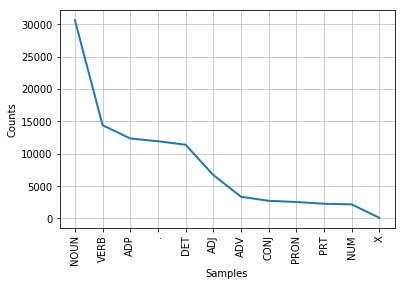

In [83]:
from matplotlib import pylab
tag_fd.plot(cumulative=False)

## 2.4   Nouns
![nouns.jpg](https://i.imgur.com/MpDuInS.jpg)

### 檢查哪個詞性最常出現在名詞之前，我們建立一個內容為其word-tag pairs的bigrams列表，e.g. (('The', 'DET'), ('Fulton', 'NP'))、(('Fulton', 'NP'), ('County', 'N'))，並計算FreqDist 

In [99]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
# nltk.Text(word_tag_pairs)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN'] # 取出NOUN前者的詞性tags
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]
# fdist.most_common()

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

## 2.5   Verbs
![verds.jpg](https://i.imgur.com/5zIg3tf.jpg)

### treebank文集中最常見的動詞排行

In [ ]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is', 'said', 'are', 'was', 'be', 'has', 'have', 'will', 'says', 'would',  
 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may',  
 'did', 'rose', 'made', 'does', 'expected', 'buy', 'take', 'get', 'might',  
 'sell', 'added', 'sold', 'help', 'including', 'should', 'reported', ...]  

### 由於words與tags是成對的，我們可以把word當作條件，tag當作事件，並使用這些pairs來建立Conditional Frequency Distribution，給定一個詞我們而我們可以得知其詞性狀況及出現頻率

In [115]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

# check
# for word,tag in word_tag_fd:
#     if word == 'yield' and (tag == 'VERB' or tag == 'NOUN'):
#         print((word,tag), word_tag_fd[(word,tag)])

[('VERB', 28), ('NOUN', 20)]

In [109]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

### 我們也可以將word與tag對調，根據詞性來反查該詞性出現最多的word是哪些
(這邊使用的tags為華爾街日報(WSJ)的tagset而非先前的universal tagset)

In [ ]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

['been', 'expected', 'made', 'compared', 'based', 'priced', 'used', 'sold',  
'named', 'designed', 'held', 'fined', 'taken', 'paid', 'traded', 'said', ...]  

### 查看VBD(過去式)與VBN(過去分詞)前的5個單詞來觀察之間的差異

In [118]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]
# nltk.help.upenn_tagset('VB.*')

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [348]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

可以看出後者kicked前面有助動詞have/has，所以為過去分詞

## 2.6   Adjectives and Adverbs

### 形容詞修飾名詞，副詞修飾動詞。

## 2.7   Unsimplified Tags
     (未化簡)

### 找出每個名詞類型中出現最頻繁的名詞(NN)  
#### $表示所有格、S表示複數、P表示專有名詞、-NC表示引用、-HL表示標題中的詞、-TL表示標題(A feature of Brown tabs)。

In [135]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [136]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('home', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("company's", 6), ("city's", 6)]
NN$-HL [("Navy's", 1), ("Golf's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("League's", 3), ("University's", 3), ("Army's", 3)]
NN-HL [('cut', 2), ('Salary', 2), ('sp.', 2), ('problem', 2), ('business', 2)]
NN-NC [('aya', 1), ('ova', 1), ('eva', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('Dr.', 41)]
NN-TL-HL [('Fort', 2), ('Grove', 1), ('Dr.', 1), ('Mayor', 1), ('City', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("janitors'", 3), ("men's", 3), ("taxpayers'", 2)]
NNS$-HL [("Idols'", 1), ("Dealers'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Bombers'", 1), ("Writers'", 1)]
NNS-HL [('returns', 1), ('Legislators', 1), ('relations', 1), ('Students', 1), ('Offenses', 1)]
NNS-

## 2.8   Exploring Tagged Corpora
### 假設我們正在研究「often」這個詞並且想知道其在句子裡是如何使用的，我們可以試著查看跟在often後面的詞彙

In [ ]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming',  
'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', ...]  

### 然而使用 tagged_words() 查看often後面詞的詞性可能更有幫助

In [138]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


可以觀察到often後面出現最高頻率的詞性是動詞(Verbs)，而名詞(Nouns)則沒有出現過。

### 接下來再看一些較大範圍的上下文，找出在 "＜Verb＞ to ＜Verb＞" 這種情況下的短句。

In [137]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

In [ ]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve  
continue to place  
serve to protect  
wanted to wait  
allowed to place  
expected to become  
expected to approve  
expected to make  
intends to make  
seek to set  
like to see  
designed to provide  
...  

### 詞性高度模糊的詞 (同一個詞有較多種不同的詞性者)很需要透過上下文來幫助辨別詞性。

In [149]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                 for (word, tag) in brown_news_tagged)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ NOUN VERB ADV
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## Part 3   Mapping Words to Properties Using Python Dictionaries

## 3.1   Indexing Lists vs Dictionaries
### index是列表中重要的屬性，透過index可以查看特並的項目(e.g. text1[100])
![Imgur](https://i.imgur.com/A4hhaMa.jpg)

### Dictionary則從key來取得value
![Imgur](https://i.imgur.com/sgXD7ON.jpg)

## 3.2   Dictionaries in Python
### Python提供Dictionary這個data type，可用於mapping任一類型，並提供高效率的方式來查詢。
#### 定義一個空的Dictionary " pos "

In [151]:
pos = {}
pos

{}

#### 給定key= ' colorless的詞性為 ' 的 value = ' ADJ '，類似說明colorless的詞性為形容詞。

In [152]:
pos['colorless'] = 'ADJ'
pos

{'colorless': 'ADJ'}

#### 添加更多項目，並將其顯示。

In [153]:
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

#### 透過key來查詢value。

In [154]:
pos['ideas']

'N'

In [155]:
pos['colorless']

'ADJ'

#### 若key尚未存在於dictionary中則會發生KeyeError

In [156]:
pos['green']

KeyError: 'green'

#### 可以透過list()將pos這個dictionary的key加入list中。

In [157]:
list(pos)

['sleep', 'furiously', 'colorless', 'ideas']

In [158]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [159]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

#### 更多不同的輸出方式。

In [160]:
for word in sorted(pos):
    print(word + ":", pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


#### 透過keys() / values() 顯示所有的 key / value，或是使用items() 使其成對顯示。

In [162]:
list(pos.keys())

['sleep', 'furiously', 'colorless', 'ideas']

In [163]:
list(pos.values())

['V', 'ADV', 'ADJ', 'N']

In [164]:
list(pos.items())

[('sleep', 'V'), ('furiously', 'ADV'), ('colorless', 'ADJ'), ('ideas', 'N')]

In [165]:
for key, val in sorted(pos.items()):
    print(key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


#### 一個key只能對應到一個value。

In [166]:
pos['sleep'] = 'V'
pos['sleep']

'V'

In [167]:
pos['sleep'] = 'N'
pos['sleep']

'N'

#### 若想要對應到兩個以上的value的話可以使用list將value包在一起。

In [168]:
pos['sleep'] = ['V','N']
pos['sleep']

['V', 'N']

## 3.3   Defining Dictionaries
### 兩種不同的dictionary定義方式

In [169]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

#### key必須為不可變的類型，例如strings、tuples。

In [170]:
pos = {['ideas', 'blogs', 'adventures']: 'N'}

TypeError: unhashable type: 'list'

## 3.4   Default Dictionaries
### 一般的dictionary如果我們試圖使用不存在dictionary中的key來查詢則會發生KeyError，DefaultDictionary可以為新的key建立一個項目並且給予默認的value，如 0 或 [ ] 。
### 建立defaultdict時必須給他一個default value type，如:int, float, str, list, dict, tuple。

In [174]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [494]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
pos['ideas']

[]

### 也可以將默認的value設定為特定的值。

In [186]:
pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
pos['blog']

'NOUN'

In [496]:
list(pos.items())

[('blog', 'NOUN'), ('colorless', 'ADJ')]

In [ ]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')

for v in v1000:
    mapping[v] = v
    
alice2 = [mapping[v] for v in alice] # 若alice中出現的word不是前1000個出現次數排名的word則將預設為'UNK'
alice2[:100]

['UNK', 'Alice', "'", 's', 'UNK', 'in', 'UNK', 'by', 'UNK', 'UNK', 'UNK',  
'UNK', 'CHAPTER', 'I', '.', 'UNK', 'the', 'Rabbit', '-', 'UNK', 'Alice',  
'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by',  
'her', 'sister', 'on', 'the', 'UNK', ',', 'and', 'of', 'having', 'nothing',  
'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'UNK', 'into', 'the',  
'book', 'her', 'sister', 'was', 'UNK', ',', 'but', 'it', 'had', 'no',  
'pictures', 'or', 'UNK', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the',  
'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without',  
'pictures', 'or', 'conversation', "?'" ...]  

In [188]:
len(set(alice2))

1001

## 3.5   Incrementally Updating a Dictionary
### 計算各詞性出現的次數

In [222]:
from collections import defaultdict
from nltk.corpus import brown

counts = defaultdict(int)
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1
counts['NOUN']

30654

### 若直接sorted()只會根據key來排序

In [215]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

### 設定參數使其根據value來排序

In [224]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [205]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

### 根據最後兩個字母來索引word

In [ ]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)
last_letters['ly']

['abactinally', 'abandonedly', 'abasedly', 'abashedly', 'abashlessly', 'abbreviately',  
'abdominally', 'abhorrently', 'abidingly', 'abiogenetically', 'abiologically', ...]  

In [ ]:
last_letters['zy']

['blazy', 'bleezy', 'blowzy', 'boozy', 'breezy', 'bronzy', 'buzzy', 'Chazy', ...]  

### 使用相同的Pattern來建立一個Anagram(字謎) Dictionary

In [260]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
# anagrams
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

### NLTK提供更方便的方式來建立Anagram(字謎) Dictionary

In [266]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
# anagrams
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

## 3.6   Complex Keys and Values
### 可以觀察到right 前面如果是一個限定詞的話，詞性應標註為ADJ

In [301]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
#     if t1 == 'DET' and w2 == 'right': # 觀察w2前面詞的詞性為t1的狀況
#         print((w1,t1),(w2,t2))
    pos[(t1, w2)][t2] += 1
pos[('DET', 'right')]

defaultdict(int, {'ADJ': 11, 'NOUN': 5})

## 3.7   Inverting a Dictionary
     (反向)
### 若給定一個key要找value可以透過dict[key]很快速的得到結果；如果給定一個value要反查key則需要比較多步驟才能實現

In [511]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1
[key for (key, value) in counts.items() if value == 32]

['brought',
 'thine',
 'virtue',
 'Him',
 'Against',
 'King',
 'There',
 'been',
 'every',
 'mortal']

### 如果經常需要使用value來反查key的話也可以建立一個映射到key的dictionary

In [304]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

### update()可以再加入一些words，這裡建立多個key具有相同value的情況，使得無法使用上述的方法來反查。
### 取而代之的方法則是建立一個新的defaultdict(list)，並將多個有相同value的key append在一起。

In [307]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

In [515]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['peacefully', 'furiously']

### Python Dictionary常用的方法
![Imgur](https://i.imgur.com/eLDuVaJ.jpg)

## Part 4   Automatic Tagging

In [516]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## 4.1   The Default Tagger
### 最簡單的tagger將每個token分配同樣的tag，為了獲得最好的效果，我們用最有可能的tag來標示每個word。

In [525]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()
# nltk.FreqDist(tags).most_common()

'NN'

### 建立一個tagger並將每個word tag標註成 NN

In [529]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

### 果然這種方法效果相當差，在一個典型的語料庫中它的正確率大概只有八分之一。


In [527]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

#### Default taggers 將tag分配給每個單詞，甚至是之前從未遇過的單詞，碰巧的是當我們處理了幾千個英文單詞時發現大多數新的詞都是名詞。意外著Default taggers可以幫助我們提高語言處理系統的穩定性。

## 4.2   The Regular Expression Tagger
### Regular expression tagger 根據匹配模式將tags分配給token。
### 舉例來說我們可能會猜測ed結尾的詞都是過去分詞，以's結尾的都是所有格等等。

In [530]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds 動名詞
     (r'.*ed$', 'VBD'),                # simple past 過去式
     (r'.*es$', 'VBZ'),                # 3rd singular present 
     (r'.*ould$', 'MD'),               # modals 情態動詞
     (r'.*\'s$', 'NN$'),               # possessive nouns 所有格
     (r'.*s$', 'NNS'),                 # plural nouns 複數名詞
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers 奇數
     (r'.*', 'NN')                     # nouns (default)
 ]

### 注意這些是按照順序處理的，第一個匹配到的將會被採用。
### 我們可以設置一個tagger使它可以tag sentence，目前正確率來到了大約五分之一。

In [531]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [535]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

### 最後一組regular expression «.*» 是將全部的tags都標記為名詞，這與Default Tagger是一樣的，但是僅在最後的狀況。

## 4.3   The Lookup Tagger
## 計算出現頻率多次的詞，其最有可能的詞性，並計算答案的精準度
### most_common(n) 所有數字按照頻率排序，返回頻率前n的數據
### nltk.UnigramTagger() 使用單詞統計的方式，對於每個詞找出最符合的Tag

In [97]:
fd = nltk.FreqDist(brown.words(categories='news')) #統計每個單字出現次數
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news')) #統計每個單字的詞性數量
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

## 使用訓練出來的tagger帶入其他sent計算

In [99]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

## 當訓練的資料量越大時可以看到精準度會提升，但提升到一個程度後上升度就會趨於平緩

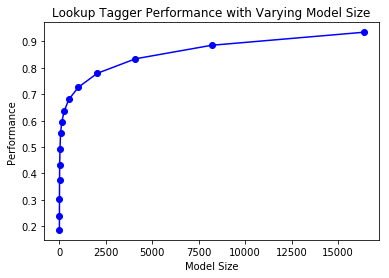

In [16]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                      backoff=nltk.DefaultTagger('NN'))
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)  #產生2次方的 array
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
display()

## Part 5 N-Gram Tagging
## 5.1   Unigram Tagging
## Unigram Tagging使用單詞統計的方式，對於每個詞找出最符合的Tag，使用nltk.UnigramTagger() 即可訓練出其結果

In [140]:
import nltk
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
brown_tagged_sents[2007]

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [146]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

### unigram_tagger.evaluate() 評估訓練結果

In [30]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

## 5.2   Separating the Training and Testing Data
## 當我們在評估訓練結果時，應該要分為Training和Testing兩組資料，在評估時使用Testing的資料來評估，才能得到較準確的答案


In [48]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [49]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

## 5.3   General N-Gram Tagging
## Unigrams只有看單詞詞性，N-Gram則會考慮前N-1個詞來做判斷
![](https://i.imgur.com/RM5lWku.jpg)
### 此圖為n=3

## 使用Bigram考慮前一個詞的詞性，訓練出新的Tagger，使用nltk.BigramTagger()即可獲得結果

In [36]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

## 使用訓練出來的Tagger，套用Testing資料中

In [34]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

## 因為bigram會將前一個詞的詞性作為判斷條件，所以詞的數量大時，就會常遇到新的詞，導致沒辦法判斷出詞性(None)，所以評估的結果也偏低

In [35]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

## 5.4   Combining Taggers
## 為了獲得到更高的準確度，我們可以加大考慮的範圍，當在原先的Tagger無法判斷詞性時，使用backoff去參考前一個訓練出來的Tagger
### nltk.DefaultTagger() 將全部的詞都定義成某個詞性

In [50]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

## 5.5   Tagging Unknown Words
## 當遇到未知的詞時，可以使用regular-expression tagger或default tagger做為backoff
## 另一個方法是將未知的詞使用 defaultdict(lambda: 'UNK') 將詞變成UNK來表示，再開始訓練，例如使用Unigrams可能得UNK通常是一個名詞，使用N-Gram判斷前面的詞通常是 to (詞性 TO)，則UNK則會被判斷成動詞

## 5.6   Storing Taggers
## 將訓練好的tageer使用pickle來存檔與讀取
### pickle可以將是序列的資料直接輸出，讀取時直接使用，不用在序列化一次

In [41]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [42]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [43]:
text = """The board's action shows what free enterprise
...     is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

## 5.7   Performance Limitations
## n-gram中n越大所獲得的有效的詞組越少，舉trigrams為例有效率只有4.9%

In [44]:
cfd = nltk.ConditionalFreqDist(
            ((x[1], y[1], z[0]), z[1])  #字[0] 詞性[1]
            for sent in brown_tagged_sents
            for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1] # trigrams組合有>1的字
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()  #.N()數量

0.049297702068029296

## 可以使用實際tagger與預期tagger產生混淆矩陣，來查看tagger錯誤與正確的數量
### nltk.ConfusionMatrix() 產生混淆矩陣

In [ ]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                  for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
r = nltk.ConfusionMatrix(gold_tags[:200], test_tags[:200])
print(r)

![](https://i.imgur.com/lDc57oY.jpg)

## Part 6   Transformation-Based Tagging
## Brill tagging是一種統計tagger方法，首先隨便猜每個單詞的tagger，然後依照規則修正錯誤

In [184]:
from nltk.tbl.template import Template
from nltk.tag.brill import Pos, Word
from nltk.tag import untag, RegexpTagger, BrillTaggerTrainer

training_data = brown.tagged_sents()[:100]
gold_data = brown.tagged_sents()[100:200]
testing_data = [untag(s) for s in gold_data]


backoff = RegexpTagger([
(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
(r'(The|the|A|a|An|an)$', 'AT'),   # articles
(r'.*able$', 'JJ'),                # adjectives
(r'.*ness$', 'NN'),                # nouns formed from adjectives
(r'.*ly$', 'RB'),                  # adverbs
(r'.*s$', 'NNS'),                  # plural nouns
(r'.*ing$', 'VBG'),                # gerunds
(r'.*ed$', 'VBD'),                 # past tense verbs
(r'.*', 'NN')                      # nouns (default)
])

baseline = backoff #see NOTE1

baseline.evaluate(gold_data) #doctest: +ELLIPSIS

0.3246918827029324

In [185]:
#templates
Template._cleartemplates() #clear any templates created in earlier tests
templates = [Template(Pos([-1])), Template(Pos([-1]), Word([0]))]
#construct a BrillTaggerTrainer

tt = BrillTaggerTrainer(baseline, templates, trace=3) #使用自己定義的 baseline 將資料丟入詞性，在與正確的比較找出規則
tagger1 = tt.train(training_data, max_rules=10)

TBL train (fast) (seqs: 100; tokens: 2268; tpls: 2; min score: 2; min acc: None)
Finding initial useful rules...
    Found 835 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  70  70   0   1  | NN->, if Pos:NN@[-1] & Word:,@[0]
  62  62   0   0  | NN->. if Pos:NN@[-1] & Word:.@[0]
  53  53   0   2  | NN->IN if Pos:NN@[-1] & Word:of@[0]
  25  25   0   9  | NN->TO if Pos:NN@[-1] & Word:to@[0]
  24  24   0   0  | NN->IN if Pos:NN@[-1] & Word:in@[0]
  22  22   0   0  | NN->CC if Pos:NN@[-1] & Word:and@[0]
  20  23   3  52  | NN->IN if Pos:VBD@[-1]
  18  18   0   0  | NN->BE if Pos:NN@[-1] & Word:be@[0]
  18  18   0   0  | NN->VBD if Pos:N

In [190]:
tagger1.evaluate(gold_data)

0.4585635359116022